In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('mtcars.csv')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
 #	문제	11
 #	cyl가	4인	자동차와	6인	자동차	그룹의	mpg	평균값	차이를	절대값으로	반올림하여	정수로	출력하시오.
cyl4 = df[df['cyl']==4]
cyl6 = df[df['cyl']==6]
print(abs(round(cyl4['mpg'].mean() - cyl6['mpg'].mean())))

7


In [27]:
# 강의 풀이
cond1 = (df['cyl']==4)
cond2 = (df['cyl']==6)
cyl4 = df[cond1]['mpg'].mean()
cyl6 = df[cond2]['mpg'].mean()
print(round(abs(cyl4 - cyl6)))

7


In [19]:
 #	문제	12
 #	hp	변수에	대해	데이터표준화(Z-score)를	진행하고	이상치의	수를	구하시오.
 #	(단,	이상치는	Z값이	1.5를	초과하거나	-1.5	미만인	값이다)
zscore = (df['hp'] - df['hp'].mean()) / df['hp'].std()
over = df[(zscore>1.5) | (zscore<-1.5)]
print(len(over))

2


In [29]:
# 강의 풀이
# Z = (X-평균)/표준편차
std = df['hp'].std()
mean_hp = df['hp'].mean()
df['zscore'] = (df['hp'] - mean_hp)/std
cond1 = (df['zscore']>1.5)
cond2 = (df['zscore']<-1.5)
print(len(df[cond1])+len(df[cond2]))

2


In [35]:
 #	문제	13
 #	mpg	컬럼을	최소최대	Scaling을	진행한	후	0.7보다	큰	값을	가지는	레코드	수를	구하라.
df['mscale'] = (df['mpg'] - df['mpg'].min())/(df['mpg'].max() - df['mpg'].min())
print(len(df[df['mscale']>0.7]))

5


In [37]:
# 강의 풀이
df = pd.read_csv('mtcars.csv')
min_mpg = df['mpg'].min()
max_mpg = df['mpg'].max()
df['mpg'] = (df['mpg']-min_mpg)/(max_mpg-min_mpg)
cond1 = (df['mpg']>0.7)
print(len(df[cond1]))

5


In [38]:
 #	문제	14
 #	wt컬럼에	대해	상자그림	기준으로	이상치의	개수를	구하시오.	
df = pd.read_csv('mtcars.csv')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


3


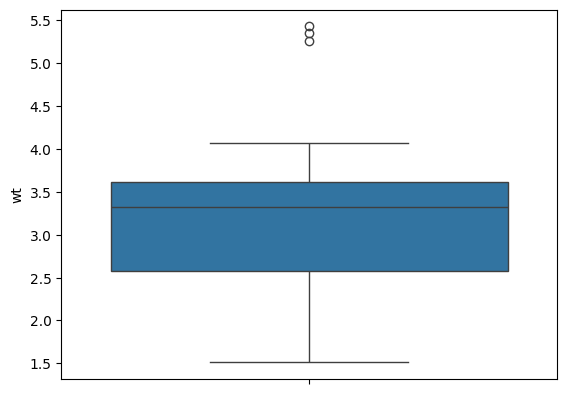

In [41]:
import seaborn as sns
sns.boxplot(df['wt'])

Q1 = df['wt'].quantile(0.25)
Q3 = df['wt'].quantile(0.75)
IQR = Q3 - Q1
cond1 = (df['wt']< Q1-1.5*IQR)
cond2 = (df['wt']> Q3+1.5*IQR)
print(len(df[cond1|cond2]))

In [44]:
# 강의 풀이
Q1 = df['wt'].quantile(0.25)
Q3 = df['wt'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR

cond1 = (df['wt']>upper)
cond2 = (df['wt']<lower)
print(len(df[cond1])+len(df[cond2]))

3
